In [1]:
import sys

if r'D:\Workspace\Pedestrian-Dead-Reckoning' not in sys.path:
    sys.path.append(r'D:\Workspace\Pedestrian-Dead-Reckoning')

In [2]:
from pedestrian_data import PedestrianDataset, PedestrianLocus

dataset = PedestrianDataset(["Magnetometer"], window_size=200, gps_preprocessed=False)

for name, locus in dataset:
    print("正在遍历移动轨迹{}... \n".format(name))

    for sample in locus:
        for k, v in sample.items():
            print(k + ":" + str(v.shape))
        break

    print(locus.columns_info())
    break

正在遍历移动轨迹NorthEastSouthWest... 

Accelerometer:(200, 4)
Gyroscope:(200, 4)
Magnetometer:(200, 4)
Linear Acceleration:(200, 4)
Location:(200, 9)
{'Accelerometer': Index(['Time (s)', 'Accelerometer.Acceleration x (m/s^2)',
       'Accelerometer.Acceleration y (m/s^2)',
       'Accelerometer.Acceleration z (m/s^2)'],
      dtype='object'), 'Gyroscope': Index(['Time (s)', 'Gyroscope.Gyroscope x (rad/s)',
       'Gyroscope.Gyroscope y (rad/s)', 'Gyroscope.Gyroscope z (rad/s)'],
      dtype='object'), 'Magnetometer': Index(['Time (s)', 'Magnetometer.Magnetic field x (µT)',
       'Magnetometer.Magnetic field y (µT)',
       'Magnetometer.Magnetic field z (µT)'],
      dtype='object'), 'Linear Acceleration': Index(['Time (s)', 'Linear Acceleration.Linear Acceleration x (m/s^2)',
       'Linear Acceleration.Linear Acceleration y (m/s^2)',
       'Linear Acceleration.Linear Acceleration z (m/s^2)'],
      dtype='object'), 'Location': Index(['location_time', 'Latitude (°)', 'Longitude (°)', 'Heig

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号’-'显示为方块的问题

In [4]:
from naive_locus_predictor import predict

def caculate_attitude (sample, theta, phi):
    positions, speeds, accelerations, thetas, phis = predict(dataset[sample], theta, phi)

    fig, axs = plt.subplots(1, 2, subplot_kw={'projection': 'polar'}, figsize=(12, 18))
    axs[0].set_theta_zero_location("N")
    axs[0].plot(thetas, dataset[sample].frame["Time (s)"][1:-1])
    axs[0].set_title("极角θ", va='bottom')
    axs[0].grid(True)

    axs[1].plot(phis, dataset[sample].frame["Time (s)"][1:-1])
    axs[1].set_title("仰角φ", va='bottom')
    axs[1].grid(True)

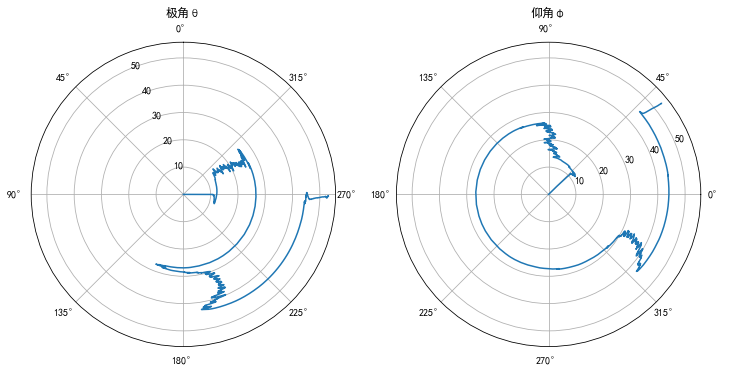

In [5]:
caculate_attitude("图书馆（东开始，向北，折返）", -1/2 * np.pi, 1/4 * np.pi)

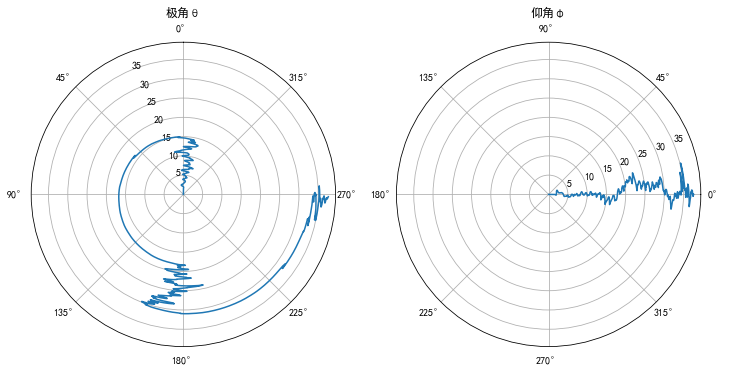

In [6]:
caculate_attitude("图书馆2", 0, 0)

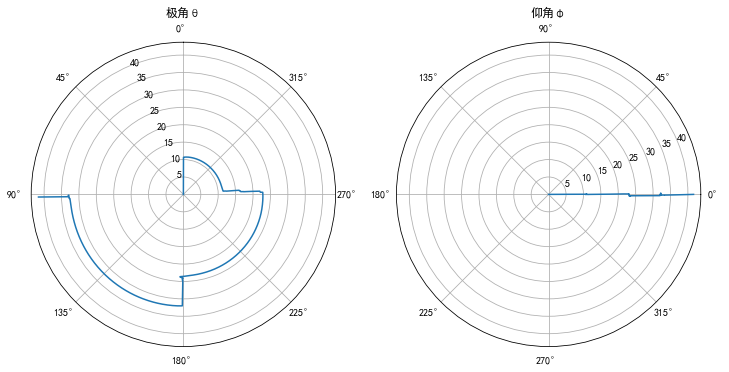

In [7]:
caculate_attitude("NorthEastSouthWest", 0, 0)

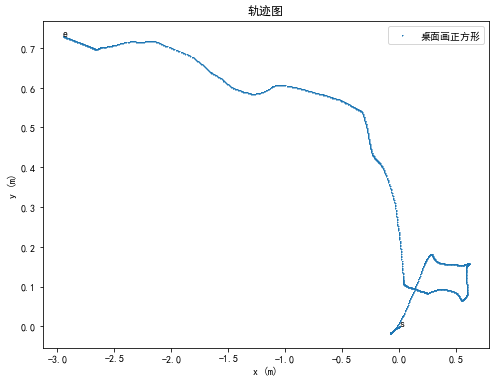

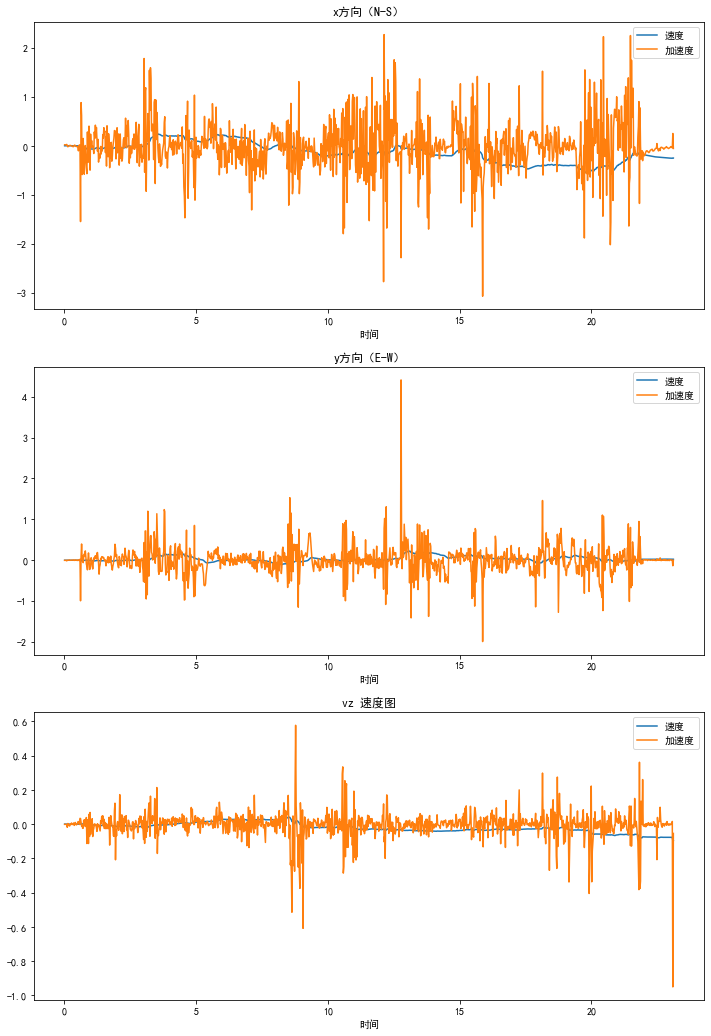

In [8]:
def caculate_locus (sample, theta, phi, no_rotation=False):
    positions, speeds, accelerations, thetas, phis = predict(dataset[sample], theta, phi, no_rotation=no_rotation)
    
    fig = plt.figure(figsize=(8, 6))
    x = positions[:, 0]
    y = positions[:, 1]
    plt.title("轨迹图")
    plt.xlabel("x (m)")
    plt.ylabel("y (m)")
    plt.text(x[0], y[0], 's', fontsize=10)
    plt.text(x[-1], y[-1], 'e', fontsize=10)
    plt.plot(x, y, '+', markersize=1, label=sample)
    plt.legend(loc="upper right")
    plt.show()
    
    fig, axs = plt.subplots(3, 1, figsize=(12, 18))
    time = dataset[sample].frame["Time (s)"][1:-1]
    vx = speeds[:, 0]
    ax = accelerations[:, 0]
    vy = speeds[:, 1]
    ay = accelerations[:, 1]
    vz = speeds[:, 2]
    az = accelerations[:, 2]
    
    axs[0].set_title("x方向（N-S）")
    axs[0].set_xlabel("时间")
    axs[0].plot(time, vx, label="速度")
    axs[0].plot(time, ax, label="加速度")
    axs[0].legend()
    
    axs[1].set_title("y方向（E-W）")
    axs[1].set_xlabel("时间")
    axs[1].plot(time, vy, label="速度")
    axs[1].plot(time, ay, label="加速度")
    axs[1].legend()
    
    axs[2].set_title("vz 速度图")
    axs[2].set_xlabel("时间")
    axs[2].plot(time, vz, label="速度")
    axs[2].plot(time, az, label="加速度")
    axs[2].legend()
    plt.show()
    
    
caculate_locus("桌面画正方形", 0, 0, no_rotation=True)
# caculate_locus("图书馆（东开始，向北，折返）", -1/2 * np.pi, 1/4 * np.pi)